### Project Summary
 - The purpose of this project is to perform exploratory data analysis (EDA) on Udemy data.
 - Various visualization libraries will be used to uncover relationships between different features.
 - This notebook will explain how to perform EDA and data visualization for the Udemy dataset.on dataset.



### Data Descripiton


| **Column**                | **Description**                                                              |
|---------------------------|------------------------------------------------------------------------------|
| `course_id`               | A unique identifier for each course.                                         |
| `course_title`            | The title of the course.                                                     |
| `url`                     | The URL where the course can be accessed.                                    |
| `is_paid`                 | Indicates whether the course is paid (`True`) or free (`False`).             |
| `price`                   | The price of the course in USD. Free courses will show a price of `0`.       |
| `num_subscribers`         | The total number of subscribers enrolled in the course.                      |
| `num_reviews`             | The total number of reviews the course has received.                         |
| `num_lectures`            | The total number of lectures included in the course.                         |
| `level`                   | The difficulty level of the course (e.g., Beginner, Intermediate, All Levels). |
| `content_duration`        | The total content duration of the course in hours.                           |
| `published_timestamp`     | The timestamp when the course was published.                                 |
| `subject`                 | The subject matter of the course (e.g., Business Finance, Graphic Design, etc.). |


# 1. Import Libaries and Loading Dataset

In [23]:
# Import Libraries
import numpy as np  # Used for numerical calculations and data manipulation.
import pandas as pd  # Used for data analysis and handling data structures (DataFrame, Series).
import matplotlib.pyplot as plt  # Basic library for 2D plotting and data visualization.
import seaborn as sns  # Used for statistical data visualization. Built on top of Matplotlib.
import missingno as msno  # Used for visualizing and analyzing missing data.
from skimpy import skim  # Used for quick summarization and inspection of data.
from wordcloud import WordCloud  # Generates word cloud visualizations from text data.

# Modify Display Settings
pd.set_option('display.max_columns', None)  # Ensures all columns are displayed.

# Warning Settings
import warnings  # Used to control and manage warning messages.
warnings.filterwarnings("ignore")  # Ignores warning messages.
warnings.warn("this will not show")  # An example warning message that is suppressed by the ignore filter.

In [29]:

# Loading & Reading Dataset
df_original = pd.read_csv('udemy_online_education_courses_dataset.csv')

# Making a copy
df = df_original.copy()

In [31]:
df.head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,True,150,9221,138,25,All Levels,3.0,2014-05-02T15:13:30Z,Business Finance
6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,True,65,1540,178,26,Beginner Level,1.0,2016-02-21T18:23:12Z,Business Finance
7,403100,"Trading Stock Chart Patterns For Immediate, Ex...",https://www.udemy.com/trading-chart-patterns-f...,True,95,2917,148,23,All Levels,2.5,2015-01-30T22:13:03Z,Business Finance
8,476268,Options Trading 3 : Advanced Stock Profit and ...,https://www.udemy.com/day-trading-stock-option...,True,195,5172,34,38,Expert Level,2.5,2015-05-28T00:14:03Z,Business Finance
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,True,200,827,14,15,All Levels,1.0,2017-04-18T18:13:32Z,Business Finance


# 2. Initial Exploration and Analyzing Values

For the start, we will do descriptive statistics on the dataset to see how diverse the data is and the condition of each data column. We use Skimpy Library to simplify the process of seeing the data as a whole quickly.

In [33]:
# Dataset Initial Summary by Skimpy Library
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3678   │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ course_id          │   0 │     0 │  676000 │  343300 │  8324 │ 407700 │ 687900 │ 961400 │ 1282000 │ ▅▆▇▇▇▆ │  │
│ │ price              │   0 │     0 │   66.05 │   61.01 │     0 │     20 │     45 │     95 │     200 │ ▇▆▂▁▁▃ │  │
│ │ num_subscribers    │   0 │     0 │    3197 │    9504 │     0 │    111 │  911.5 │   2546 │  268900 │   ▇    │  │
│ │ num_reviews        │   0 │     0 │   156.3 │   935.5 │     0 │      4 │     18 │     67 │   27440 │   ▇    │  │
│ │ num_lectures       │   0 │     0 │   40.11 │   50.38 │     0 │     15 │     25 │  45.75 │     779 │   ▇    │  │
│ │ content_duration   │   0 │     0 │   4.095 │   6.054 │     0 │      1 │      2 │    4.5 │    78.5 │   ▇    │  │
│ └────────────────────┴─────┴───────┴─────────┴─────────┴───────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ is_paid                            │            3368 │                          0.92 │       ▁    ▇        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ course_title                         │     0 │         0 │                      7.2 │                26418 │  │
│ │ url                                  │     0 │         0 │                        1 │                 3678 │  │
│ │ level                                │     0 │         0 │                        2 │                 7356 │  │
│ │ published_timestamp                  │     0 │      

In [35]:
# Viewing Null, Unique and Duplicated Values

pd.DataFrame({
                'Count':df.shape[0],
                'Column':df.shape[1],
                'Size':df.size,
                'Null':df.isnull().sum(),
                'Null %':df.isnull().mean() * 100,
                'Not-Null':df.notnull().sum(),
                'Unique':df.nunique(),
                'Duplicated':df.duplicated().sum()
})

,Count,Column,Size,Null,Null %,Not-Null,Unique,Duplicated
course_id,3678,12,44136,0,0.0,3678,3672,6
course_title,3678,12,44136,0,0.0,3678,3663,6
url,3678,12,44136,0,0.0,3678,3672,6
is_paid,3678,12,44136,0,0.0,3678,2,6
price,3678,12,44136,0,0.0,3678,38,6
num_subscribers,3678,12,44136,0,0.0,3678,2197,6
num_reviews,3678,12,44136,0,0.0,3678,511,6
num_lectures,3678,12,44136,0,0.0,3678,229,6
level,3678,12,44136,0,0.0,3678,4,6
content_duration,3678,12,44136,0,0.0,3678,105,6


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [22]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [24]:
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5


In this section we will explore the “udemy” dataset, it can be seen that in this dataset there are 6 columns with integer data types, 5 string data types and then 1 for boolean data types. Then we can see that the data that has 3678 rows has 6 duplicate rows in it which is then found that there are no null values in this dataset. So with that, we will do the process to remove the duplicates in it.

In [32]:
df.duplicated().sum()

6

In [34]:
# Dropping duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

The process of eliminating data duplication is carried out so that when the duplication process ensures that there is no data that has double values or can be double counting.

In [36]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

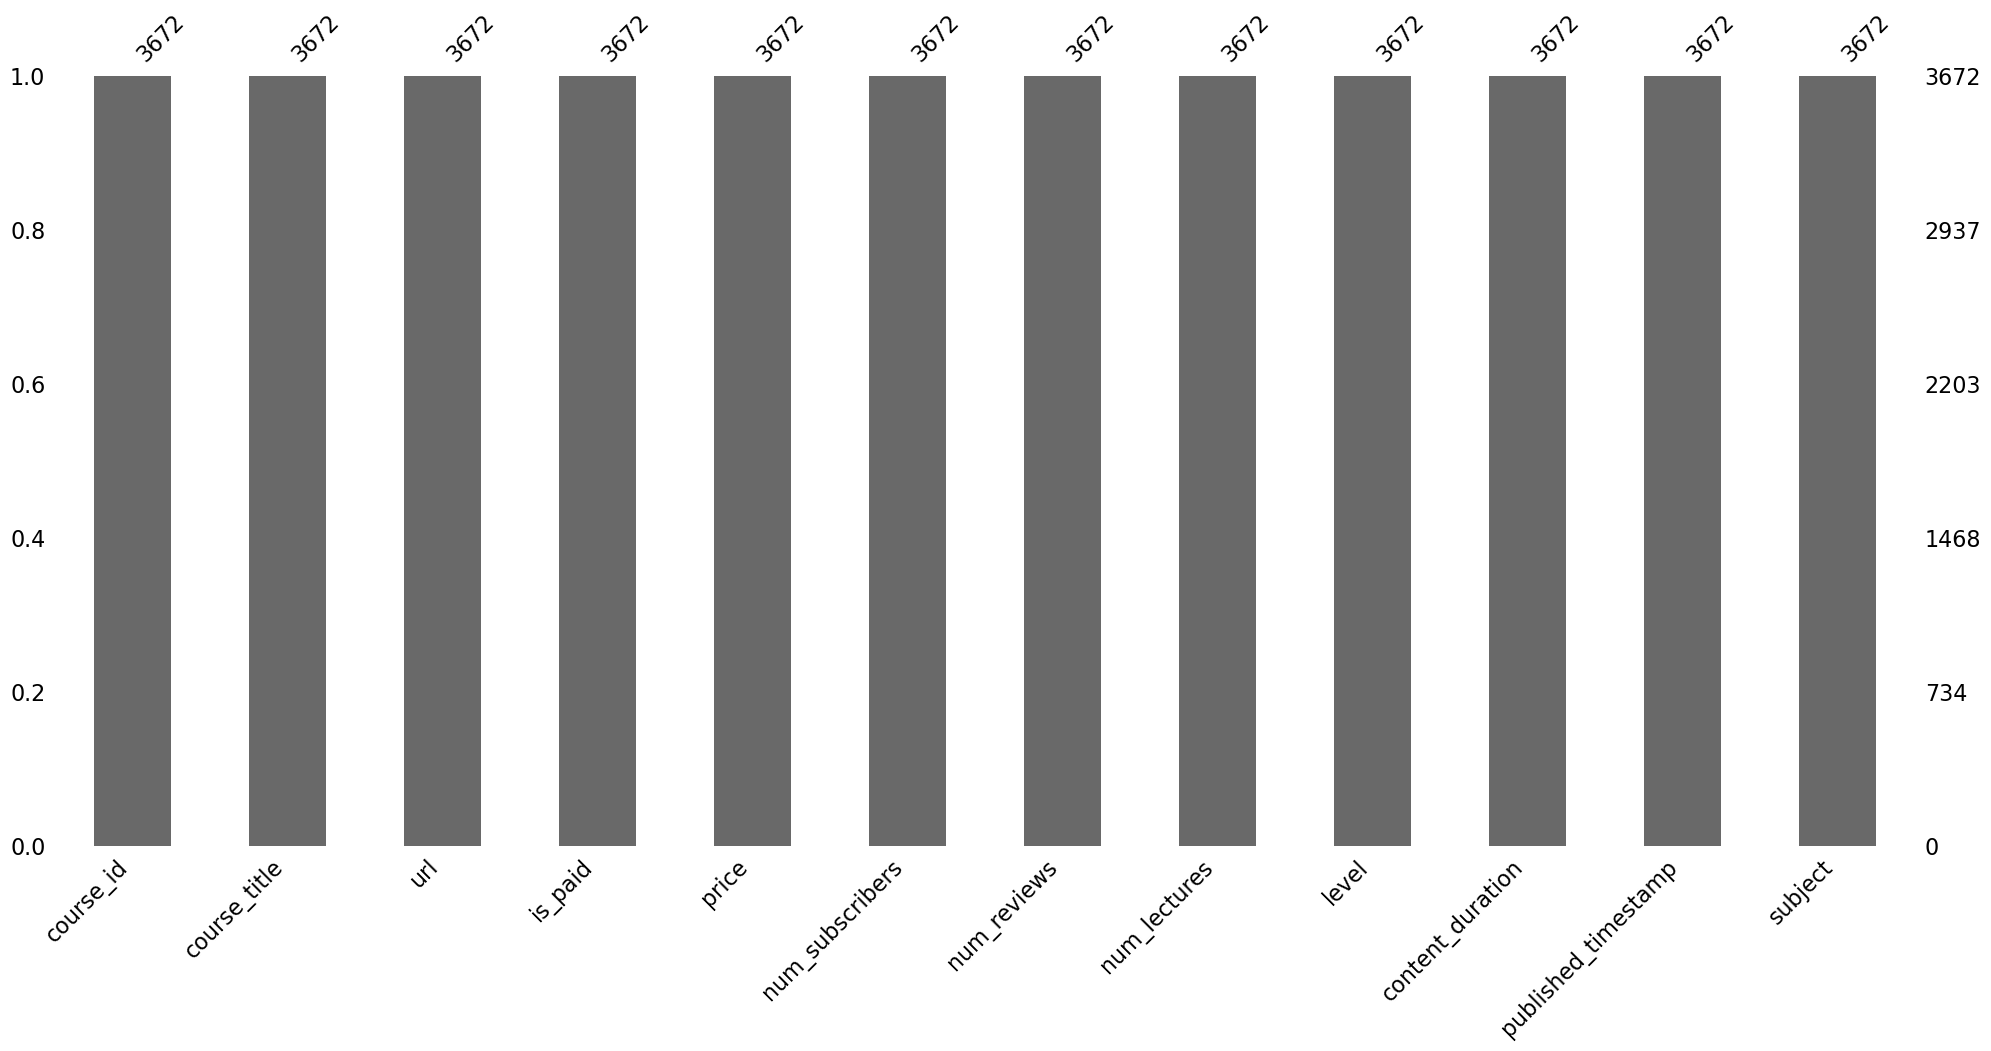

In [38]:
# Missingno Bar Chart for Missing Value Detection
msno.bar(df);

In this process, the process of checking NULL or NaN data is carried out even though it was previously done at the beginning of the process, but it would be nice to do it again to make sure there is really no null data in it. The missigno library is used so that the process to see null data can be seen where it is concentrated. From the process above, it can be seen that there are no null data values in the entire data column that we want to analyze.
n)

# 3. Organizing and Manipulating Data

In [46]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [42]:
df["is_paid"].describe()

count     3672
unique       2
top       True
freq      3362
Name: is_paid, dtype: object

#### Feature Engginering in Price Column

In [54]:
df["price"].describe()

count    3672.000000
mean       66.102941
std        61.035920
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

In [52]:
# Define price categories
def categorize_price(price):
    if price == 0:
        return 'Free'
    elif price <= 50:
        return 'Low'
    elif 50 < price <= 150:
        return 'Medium'
    else:
        return 'High'

df['price_range'] = df['price'].apply(categorize_price)


df['price_range'].value_counts()

price_range
Low       2034
Medium     849
High       485
Free       310
Name: count, dtype: int64

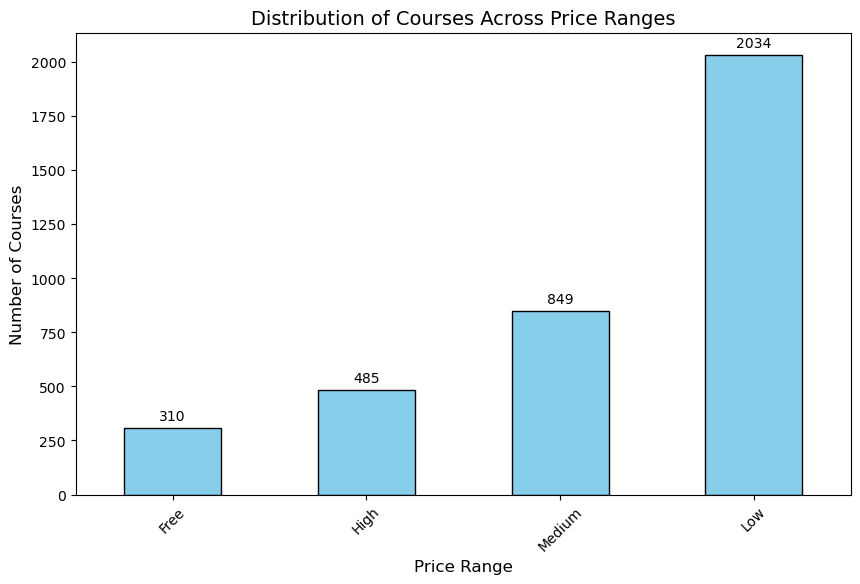

In [58]:
plt.figure(figsize=(10, 6))
price_range_counts = df['price_range'].value_counts(ascending=True)

price_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Courses Across Price Ranges', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Courses', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adding text labels on top of each bar for clarity
for index, value in enumerate(price_range_counts):
    plt.text(index, value + 20, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


We create categorical in this data from price dataset. So we can make a trend about price-content relationship. From the visualization above, it can be seen that the largest distribution of content is the price with the “low” label range, but what is interesting is that the content with the “free” label has the least distribution of the number of courses.

#### Feature Enginnering in subscriber and reviews data

In [68]:
df["num_reviews"].describe()
# df.num_reviews.head()

count     3672.000000
mean       156.371460
std        936.178649
min          0.000000
25%          4.000000
50%         18.000000
75%         67.000000
max      27445.000000
Name: num_reviews, dtype: float64

In [64]:
df["num_subscribers"].describe()
df.num_subscribers.head()

0    2147
1    2792
2    2174
3    2451
4    1276
Name: num_subscribers, dtype: int64

In [67]:
# Calculate the engagement rate as the ratio of num_reviews to num_subscribers
# Add a small constant to the denominator to avoid division by zero

df['engagement_rate'] = df['num_reviews'] / (df['num_subscribers'] + 1)

df[['course_title', 'num_subscribers', 'num_reviews', 'engagement_rate']].head()


,course_title,num_subscribers,num_reviews,engagement_rate
0,Ultimate Investment Banking Course,2147,23,0.010708
1,Complete GST Course & Certification - Grow You...,2792,923,0.330469
2,Financial Modeling for Business Analysts and C...,2174,74,0.034023
3,Beginner to Pro - Financial Analysis in Excel ...,2451,11,0.004486
4,How To Maximize Your Profits Trading Options,1276,45,0.035239


We do a process to combine reviews and subscribers to see how active a course's engagement is so that we can see which courses are most active in the community.

In [70]:
df.level.describe()

count           3672
unique             4
top       All Levels
freq            1925
Name: level, dtype: object

In [72]:
df.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [74]:
df["published_timestamp"].head()


0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [184]:
# Create date-time array
df["published_timestamp"] = pd.to_datetime(df["published_timestamp"])
df["published_timestamp"].head()


0   2017-01-18 20:58:58+00:00
1   2017-03-09 16:34:20+00:00
2   2016-12-19 19:26:30+00:00
3   2017-05-30 20:07:24+00:00
4   2016-12-13 14:57:18+00:00
Name: published_timestamp, dtype: datetime64[ns, UTC]

In [186]:
df['Year'] = df['published_timestamp'].dt.year
df['Month'] = df['published_timestamp'].dt.month
df['Day'] = df['published_timestamp'].dt.day

# 4. Visualization and Further Analysis

In [80]:

df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'price_range',
       'engagement_rate'],
      dtype='object')

#### Analysis for Pricing Schema Course

In [146]:
df_group_freepaid_year = df.groupby('is_paid')['Year'].value_counts()
df_group_freepaid_year

is_paid  Year
False    2016      97
         2017      78
         2015      62
         2014      52
         2013      17
         2012       4
True     2016    1107
         2015     952
         2017     635
         2014     438
         2013     184
         2012      41
         2011       5
Name: count, dtype: int64

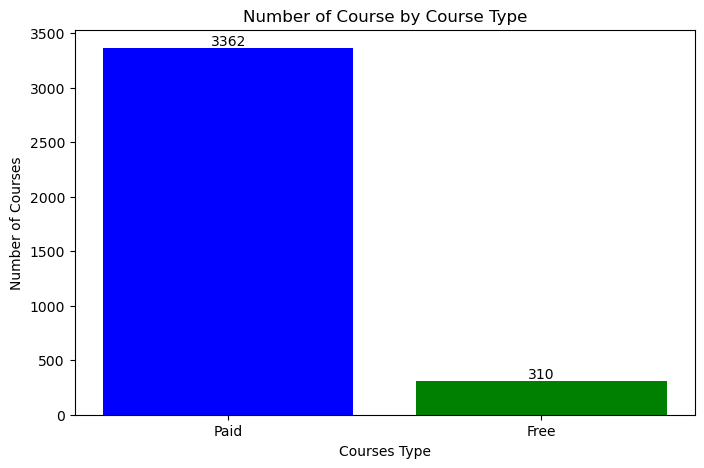

In [110]:
plt.figure(figsize=(8, 5))  # Adjust chart size
bars = plt.bar(free_paid_count.index.map({True: 'Paid', False: 'Free'}), free_paid_count.values, color=['blue', 'green'])

# Axis labels and title
plt.xlabel('Courses Type')
plt.ylabel('Number of Courses')
plt.title('Number of Course by Course Type')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
    
plt.show()

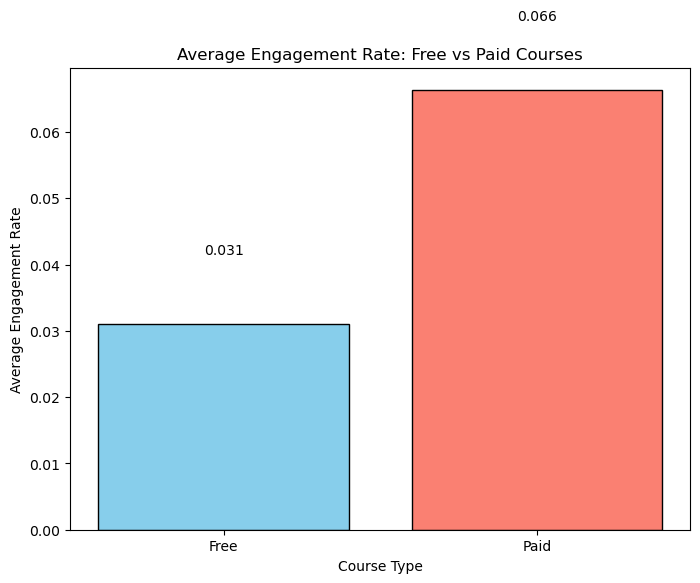

In [82]:
# Calculate the average engagement rate for free and paid courses
engagement_free_paid = df.groupby('is_paid')['engagement_rate'].mean().reset_index()

# Map the is_paid column to more descriptive labels for plotting
engagement_free_paid['is_paid'] = engagement_free_paid['is_paid'].map({True: 'Paid', False: 'Free'})

# Plotting the average engagement rate for free vs paid courses
plt.figure(figsize=(8, 6))
plt.bar(engagement_free_paid['is_paid'], engagement_free_paid['engagement_rate'], color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Average Engagement Rate: Free vs Paid Courses')
plt.xlabel('Course Type')
plt.ylabel('Average Engagement Rate')

# Adding data labels
for index, value in enumerate(engagement_free_paid['engagement_rate']):
    plt.text(index, value + 0.01, f"{value:.3f}", ha='center', va='bottom', fontsize=10)

plt.show()


From the graph above, it can be seen that the average enggament on paid courses is higher, this can be interpreted that people who buy paid courses are more active in completing and taking part in completing the course.

In [93]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'price_range',
       'engagement_rate'],
      dtype='object')

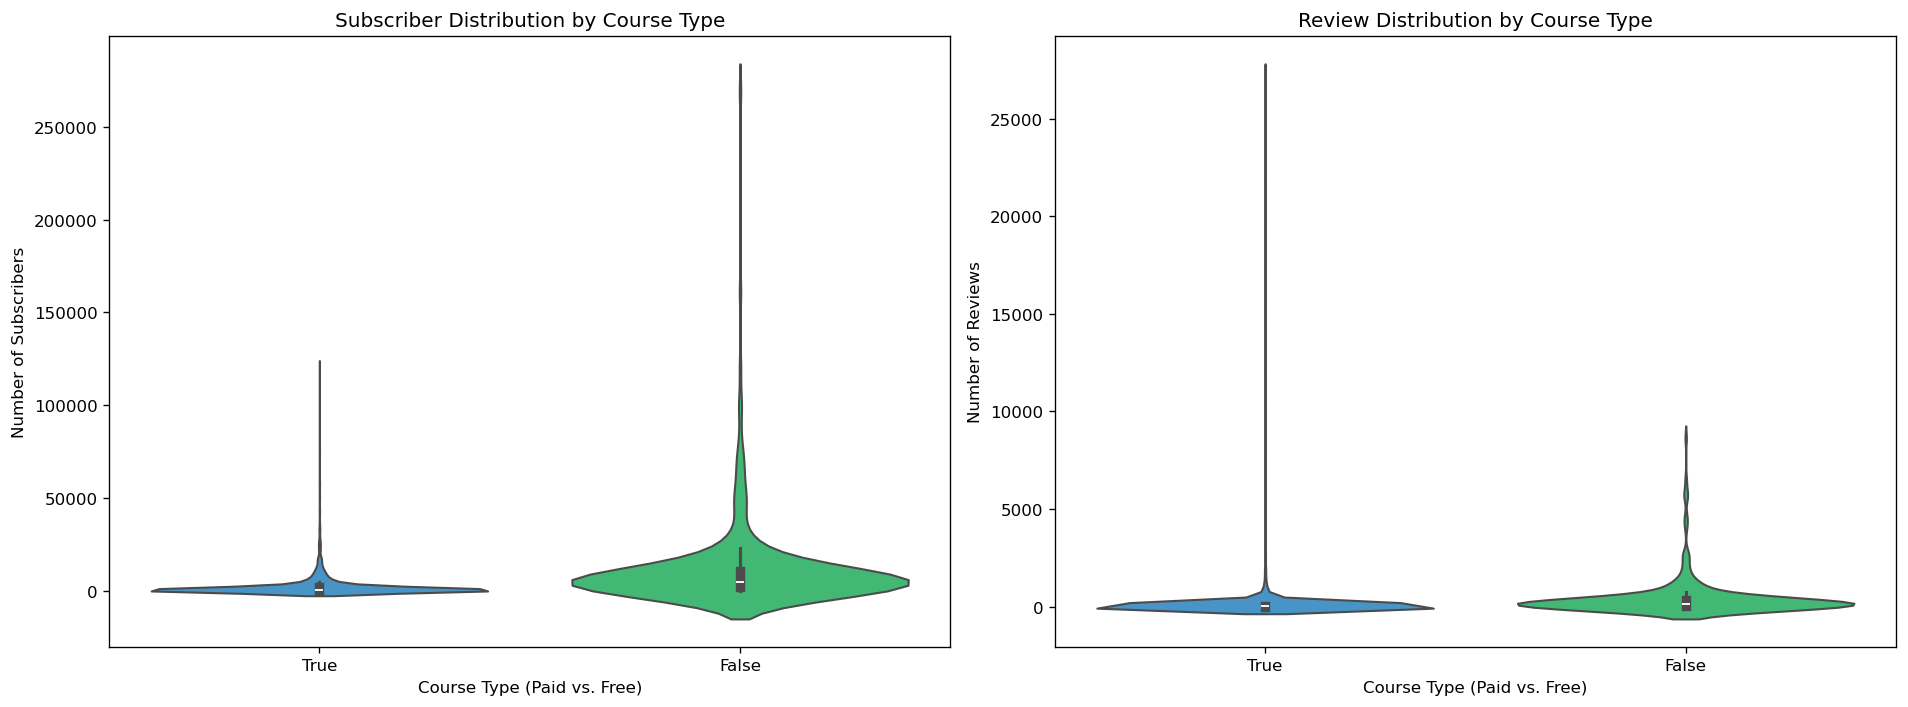

In [127]:
# Set up the figure and axes for a cleaner, more comparative visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=120)

# Palette for clarity and aesthetics
palette = {"True": "#3498db", "False": "#2ecc71"} 

# Plot for number of subscribers
sns.violinplot(ax=axes[0], x=df['is_paid'].astype(str), y='num_subscribers', data=df,
               palette=palette)
axes[0].set_title('Subscriber Distribution by Course Type')
axes[0].set_xlabel('Course Type (Paid vs. Free)')
axes[0].set_ylabel('Number of Subscribers')

# Plot for number of reviews
sns.violinplot(ax=axes[1], x=df['is_paid'].astype(str), y='num_reviews', data=df,
               palette=palette)
axes[1].set_title('Review Distribution by Course Type')
axes[1].set_xlabel('Course Type (Paid vs. Free)')
axes[1].set_ylabel('Number of Reviews')

# Improve layout and display the plot
plt.tight_layout()
plt.show()


##### Subscriber Distribution by Course Type:

1. Free Courses (Green): The distribution for free courses typically shows a wider spread and higher peaks, suggesting that free courses generally attract more subscribers. This likely reflects the lower barrier to entry, as users are more willing to enroll in a course when there's no financial commitment involved.
2. Paid Courses (Blue): The distribution for paid courses is narrower with lower peaks, indicating fewer subscribers on average compared to free courses. This suggests that the financial cost might deter some potential learners, though those who do enroll may perceive the content as valuable enough to justify the expense.

##### Review Distribution by Course Type:

1. Free Courses (Green): Reviews for free courses also show a wide distribution but with a lot of variability, suggesting that while many users enroll, the degree of engagement (as reflected by reviews) varies significantly. Some free courses might drive high engagement, but others may not compel users to leave reviews.
2. Paid Courses (Blue): Similar to subscriber trends, the review counts for paid courses tend to be lower but might show slightly less variability than free courses. This can imply a generally consistent but moderate level of engagement among paid learners. The financial investment may lead to more commitment to completing the course and hence more likelihood to review.

In [156]:
average_ratings_by_content = df.groupby('is_paid')['content_duration'].mean()
average_ratings_by_content

is_paid
False    2.210753
True     4.271584
Name: content_duration, dtype: float64

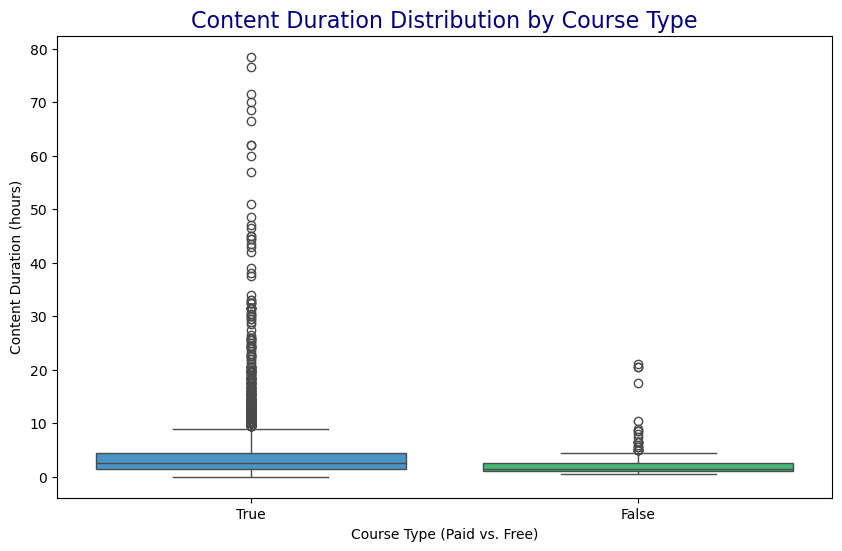

In [131]:
# box plot for content duration by course type
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['is_paid'].astype(str), y="content_duration", data=df,
            palette={"True": "#3498db", "False": "#2ecc71"})  # Blue for Paid, Green for Free

# Enhancing title and labels with proper descriptions and aesthetics
plt.title("Content Duration Distribution by Course Type", fontdict={'fontsize': 16, 'color': 'navy'})
plt.xlabel('Course Type (Paid vs. Free)')
plt.ylabel('Content Duration (hours)')

# Show the improved plot
plt.show()


1. Free Courses (Green): These courses tend to have a wider range of content duration, which can include very short to relatively long courses. This could indicate a diversity in the types of courses offered for free, from brief introductory sessions to more extensive training.
2. Paid Courses (Blue): The interquartile range (the body of the box) tends to be tighter for paid courses, suggesting more consistency in content length. The outliers indicate that there are also some significantly lengthy courses, possibly detailed and comprehensive courses that justify their cost.

#### Analysis for Price and Price Range

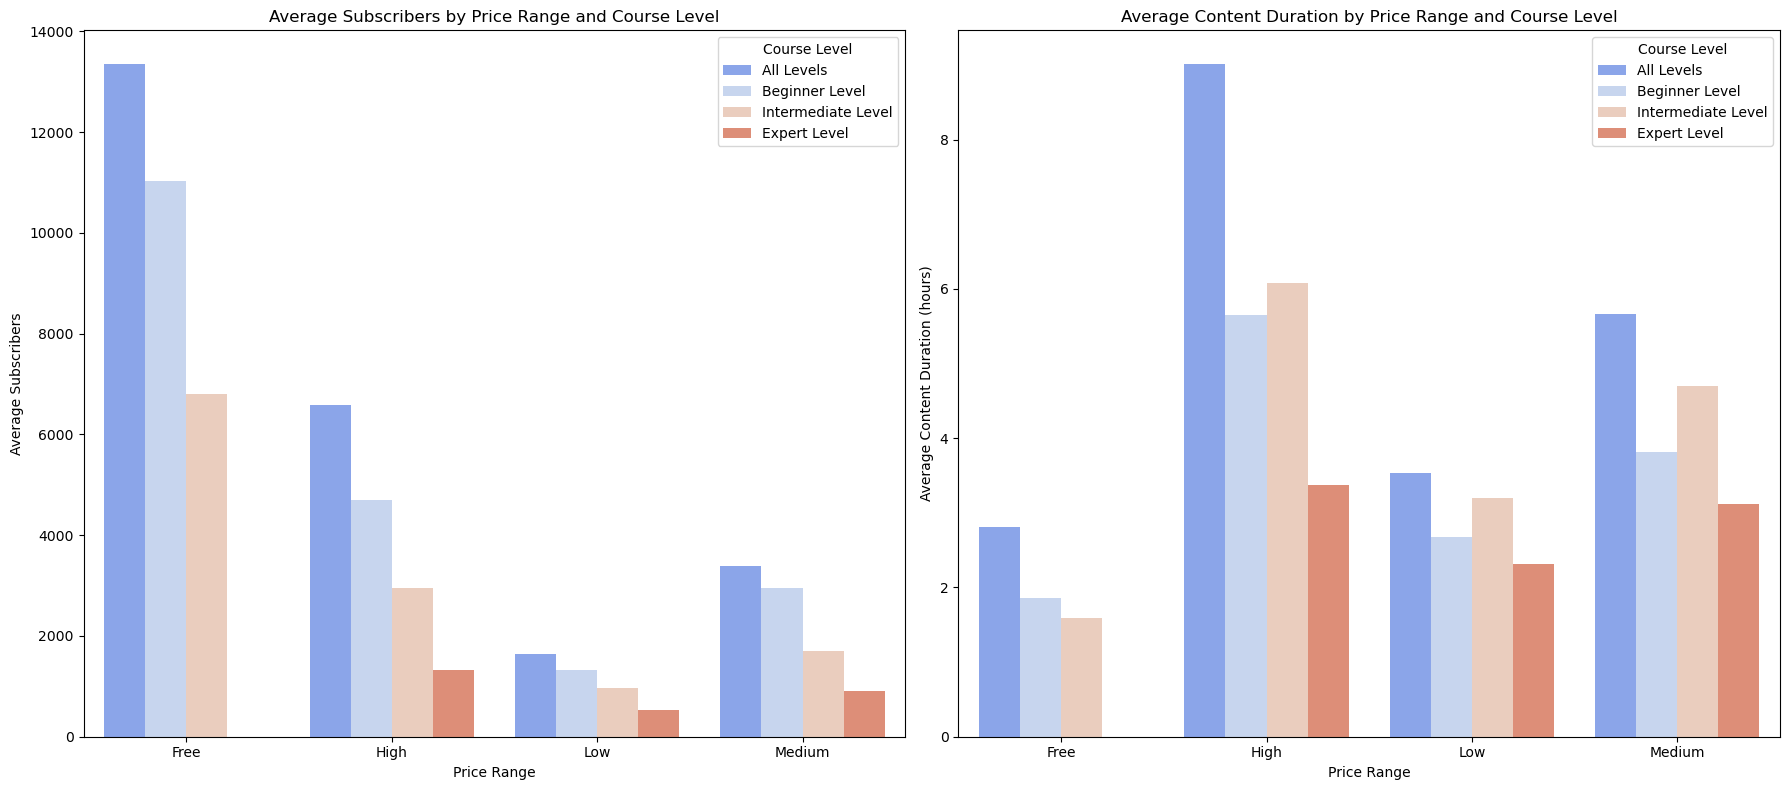

In [155]:
# Group data by price range and course level, then calculate relevant metrics
cross_analysis = df.groupby(['price_range', 'level']).agg(
    avg_subscribers=('num_subscribers', 'mean'),
    avg_reviews=('num_reviews', 'mean'),
    avg_content_duration=('content_duration', 'mean')
).reset_index()

# Visualization to show the cross-analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot for average subscribers by price range and course level
sns.barplot(x='price_range', y='avg_subscribers', hue='level', data=cross_analysis, ax=ax1, palette='coolwarm')
ax1.set_title('Average Subscribers by Price Range and Course Level')
ax1.set_xlabel('Price Range')
ax1.set_ylabel('Average Subscribers')
ax1.legend(title='Course Level')

# Plot for average content duration by price range and course level
sns.barplot(x='price_range', y='avg_content_duration', hue='level', data=cross_analysis, ax=ax2, palette='coolwarm')
ax2.set_title('Average Content Duration by Price Range and Course Level')
ax2.set_xlabel('Price Range')
ax2.set_ylabel('Average Content Duration (hours)')
ax2.legend(title='Course Level')

plt.tight_layout()
plt.show()


#### Average Subscribers by Price Range and Course Level
1. Higher Levels in Higher Price Ranges: Courses categorized under "All Levels" generally have more subscribers across all price ranges, particularly in the free and high price categories. This suggests that courses designed to cater to a broad audience tend to attract more subscribers.
2. Beginner Courses: Tend to perform well in the free price range, suggesting that free beginner-level courses are particularly attractive, possibly as entry points for new learners.
3. Expert-Level Courses: Show notably fewer subscribers, especially in higher price ranges, which may indicate a niche audience that's smaller but potentially more dedicated.
#### Average Content Duration by Price Range and Course Level
1. Content Depth: The average content duration tends to increase with the price range, especially noticeable in courses for "All Levels" and "Intermediate Levels." High price range courses offer significantly more content, likely reflecting more comprehensive or in-depth material.
2. Expert-Level Courses: Despite having fewer subscribers, expert-level courses don't necessarily offer longer content durations, which could suggest a focus on high-value, specialized topics that are covered concisely.

In [158]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'price_range',
       'engagement_rate'],
      dtype='object')

### Subscriber, Reviews, and Lectures analysis

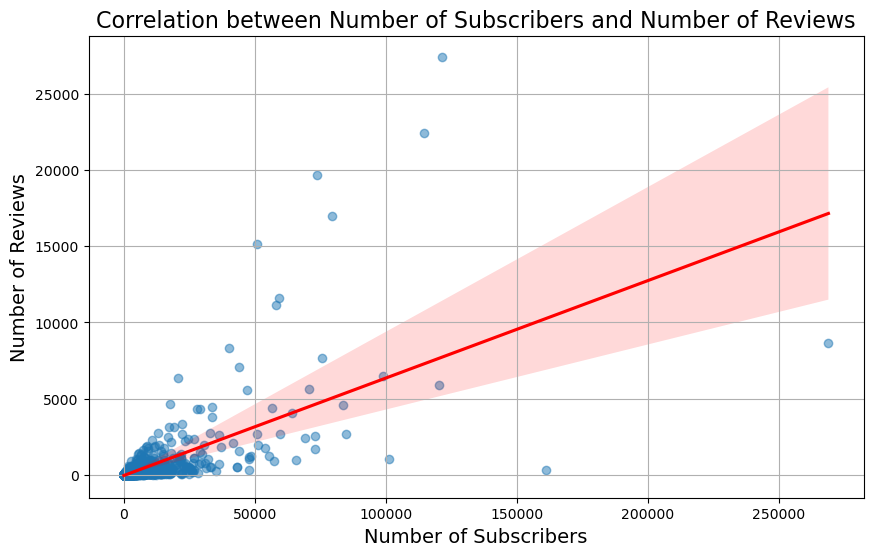

In [161]:
# Scatter plot to explore the correlation between number of subscribers and number of reviews
plt.figure(figsize=(10, 6))
sns.regplot(x='num_subscribers', y='num_reviews', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Number of Subscribers and Number of Reviews', fontsize=16)
plt.xlabel('Number of Subscribers', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.grid(True)
plt.show()

1. Positive Correlation: There is a visible positive trend indicating that as the number of subscribers increases, the number of reviews generally increases as well. This suggests higher subscriber engagement in courses with more enrollees.
2. Data Spread: The data points are more concentrated at lower subscriber and review counts, which is typical for most courses. However, there are some courses with a very high number of subscribers that do not have a proportionally high number of reviews, indicating variability in engagement.

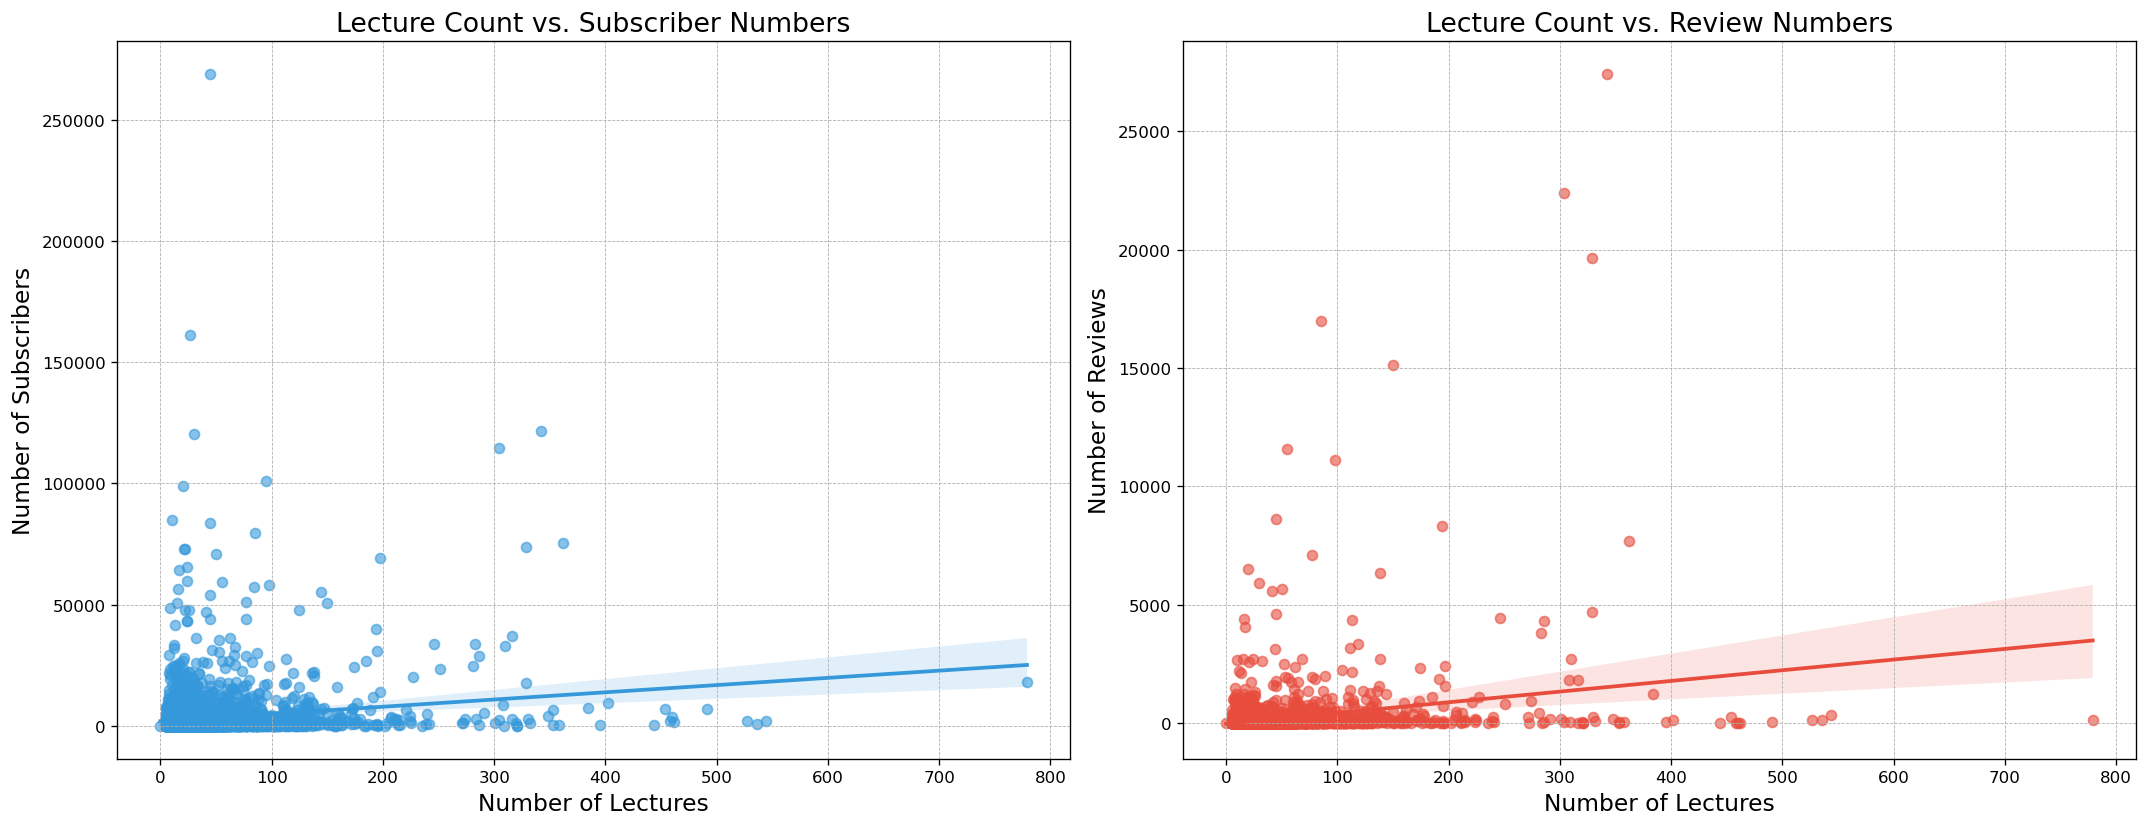

In [169]:
# Improved visualization for scatter plots with enhanced aesthetics
fig, axes = plt.subplots(1, 2, figsize=(18, 7), dpi=120)

# Custom color and marker style for the plots
color1, color2 = '#3498db', '#e74c3c'  # Blue for subscribers, Red for reviews

# Scatter plot for number of lectures vs. number of subscribers
sns.regplot(ax=axes[0], x='num_lectures', y='num_subscribers', data=df,
            scatter_kws={'alpha': 0.6, 'color': color1}, line_kws={'color': color1})
axes[0].set_title('Lecture Count vs. Subscriber Numbers', fontsize=16)
axes[0].set_xlabel('Number of Lectures', fontsize=14)
axes[0].set_ylabel('Number of Subscribers', fontsize=14)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Scatter plot for number of lectures vs. number of reviews
sns.regplot(ax=axes[1], x='num_lectures', y='num_reviews', data=df,
            scatter_kws={'alpha': 0.6, 'color': color2}, line_kws={'color': color2})
axes[1].set_title('Lecture Count vs. Review Numbers', fontsize=16)
axes[1].set_xlabel('Number of Lectures', fontsize=14)
axes[1].set_ylabel('Number of Reviews', fontsize=14)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Improve overall layout and visual spacing
plt.tight_layout()
plt.show()


##### Number of Lectures vs. Number of Subscribers:
Correlation Coefficient: 0.158
This indicates a weak positive correlation between the number of lectures and the number of subscribers. It suggests that courses with more lectures tend to have slightly more subscribers, but the effect is not strong.

##### Number of Lectures vs. Number of Reviews:
Correlation Coefficient: 0.243
This shows a moderate positive correlation, suggesting that courses with more lectures tend to receive more reviews, which could indicate higher engagement or course completion rates.

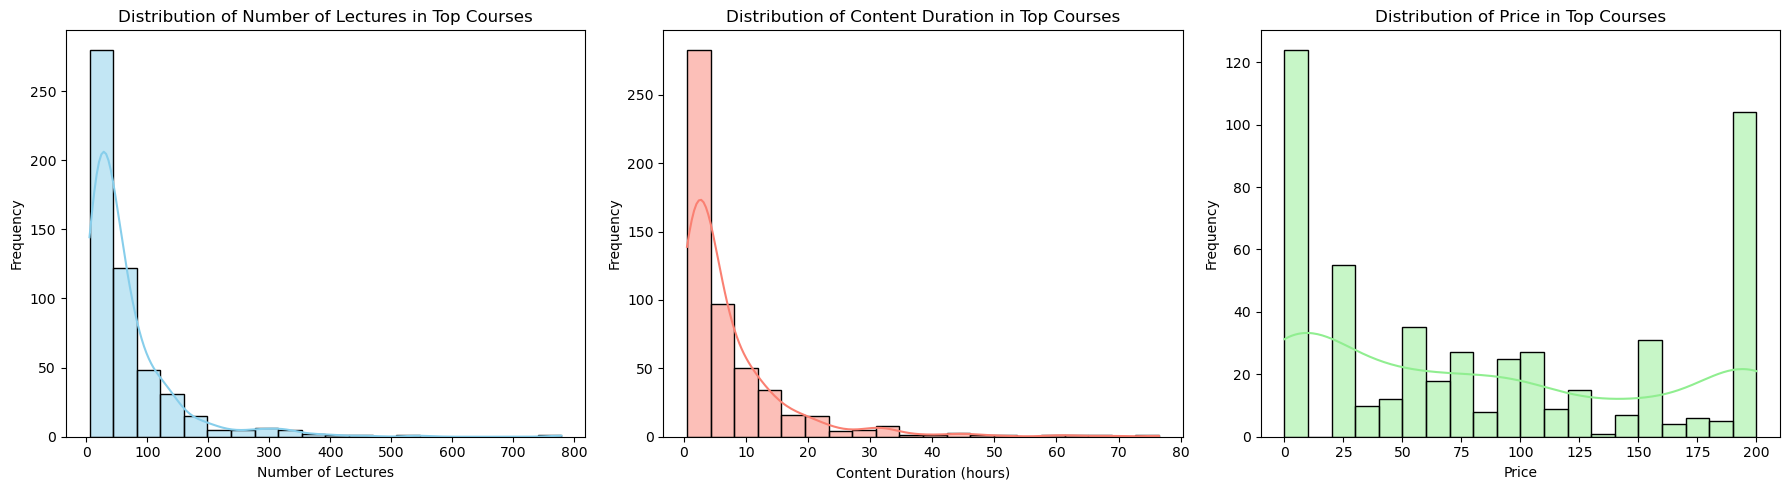

In [173]:
# Define the top 10% cutoff for subscribers and reviews
subscriber_cutoff = df['num_subscribers'].quantile(0.90)
review_cutoff = df['num_reviews'].quantile(0.90)

# Filter the dataset to include only the top 10% of courses based on subscribers or reviews
top_courses = df[(df['num_subscribers'] >= subscriber_cutoff) | (df['num_reviews'] >= review_cutoff)]

# Calculate common statistics for these top performing courses
top_courses_stats = top_courses.describe()

# Visualize the distribution of some key metrics among the top courses
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for number of lectures
sns.histplot(top_courses['num_lectures'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Number of Lectures in Top Courses')
axes[0].set_xlabel('Number of Lectures')
axes[0].set_ylabel('Frequency')

# Histogram for content duration
sns.histplot(top_courses['content_duration'], bins=20, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribution of Content Duration in Top Courses')
axes[1].set_xlabel('Content Duration (hours)')
axes[1].set_ylabel('Frequency')

# Histogram for price
sns.histplot(top_courses['price'], bins=20, kde=True, color='lightgreen', ax=axes[2])
axes[2].set_title('Distribution of Price in Top Courses')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# # Output the common statistics for top courses
# top_courses_stats


Top 10% kursus diukur berdasarkan jumlah daripada subscriber dan review dari sebuah kursus sehingga nanti dapat kita analisis lebih lanjut untuk melihat bagaimana karakteristik kursus-kursus top 10% di udemy.

1. Dari grafik diatas terlihat bahwasannya top 10% dari jumlah konten kursusr berada diantara 20-40 konten kursus
2. Kemudian durasi konten dengan peak terbesar terjadi antara 0-10 jam
3. harga sendiri terlihat bahwasannya kursus dengan harga 0-15 dollar  memiliki frekuensi yang tinggi namun yang menarik harga dengan frekuensi hampir ke 200$ memiliki frekuensi tertinggi kedua


In [188]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'price_range',
       'engagement_rate', 'Year', 'Month', 'Day'],
      dtype='object')

### Trend Udemy Course

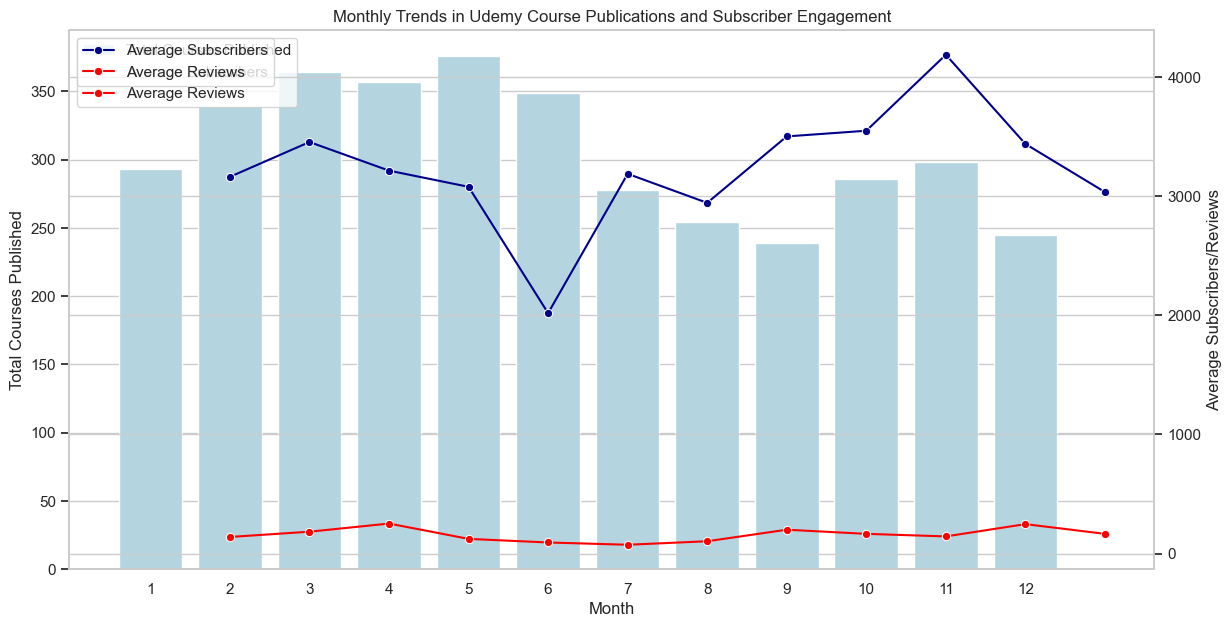

,Month,total_courses,avg_subscribers,avg_reviews
0,1,293,3162.255973,139.522184
1,2,339,3454.389381,183.722714
2,3,364,3214.211538,252.098901
3,4,357,3078.310924,123.529412
4,5,376,2017.890957,93.183511
5,6,349,3187.452722,74.191977
6,7,278,2943.780576,103.615108
7,8,254,3501.448819,200.330709
8,9,239,3549.012552,165.623431
9,10,286,4186.814685,144.181818


In [198]:
# Aggregate data by month to analyze course publications and average subscribers
monthly_trends = df.groupby('Month').agg(
    total_courses=('course_id', 'count'),
    avg_subscribers=('num_subscribers', 'mean'),
    avg_reviews=('num_reviews', 'mean')
).reset_index()

# Visualization of monthly trends in course publications and subscriber engagement
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Create a bar plot for total courses published by month
ax1 = sns.barplot(x='Month', y='total_courses', data=monthly_trends, color='lightblue', label='Total Courses Published')

# Create a line plot for average subscribers by month
ax2 = ax1.twinx()
sns.lineplot(x='Month', y='avg_subscribers', data=monthly_trends, marker='o', ax=ax2, color='darkblue', label='Average Subscribers')
sns.lineplot(x='Month', y='avg_reviews', data=monthly_trends, marker='o', ax=ax2, color='red', label='Average Reviews')

ax1.set_title('Monthly Trends in Udemy Course Publications and Subscriber Engagement')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Courses Published')
ax2.set_ylabel('Average Subscribers/Reviews')

# Adding legend with handles from both plots
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.show()

monthly_trends


#### Total Courses Published:

1. The number of courses published varies somewhat throughout the year, with noticeable peaks around February, March, and May. There's a slight dip in publications towards the end of the year, particularly in December.
Average Subscribers:
2. Subscriber counts show some seasonality, with peaks often occurring in February, August, September, and especially October. This might indicate a higher interest in learning activities during these months, possibly linked to academic cycles or seasonal behavior changes.
Average Reviews:
3. The average reviews per course generally follow a similar pattern to subscribers, with higher values in March and November, indicating more active user engagement during these months.

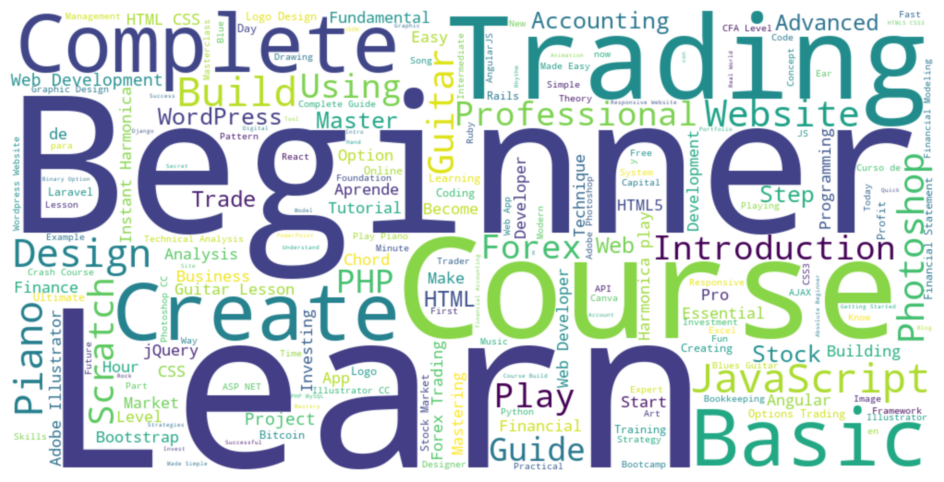

In [178]:
# Create Google Play Store Apps Word Cloud

# Aggregate all application names in the ‘App’ column
text = ' '.join(df['course_title'])

wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(text)

# Set graphics properties
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.show()